In [5]:
import numpy as np
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import skimage
import cv2
import json


In [1]:
# read data

#path = 'data/train/train-1-0/'

cameras = ['B05', 'B04', 'B03', 'B02', 'B01', \
           'G01', 'G02', 'G03', 'G04', 'G05']

n = 0  
def get_frame(n, path):
    frames = {}
    for i in range(10):
        frames[i] = cv2.imread(path + '%d-%s.png'%(n, cameras[i]))
    return frames

def get_homography(n, path):
    with open(path + 'homographies.json') as f:
        h = json.load(f)
    return h
            


def warp_images(n, frames, path):
    
    warped_images = {}
    homography = get_homography(n, path)
    for i in range(10):
        h1 = np.asarray(homography['%d-'%n + cameras[i]])
        warped_images['%d-'%n + cameras[i]] = cv2.warpPerspective(frames, 
                                                                  h1, 
                                                                  frames.shape[:2])
    
    dst = cv2.addWeighted(warped_images['0-' + cameras[0]], 0.5,
                      warped_images['0-' + cameras[1]], 0.5, 
                      0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[2]], 0.5, 
                          0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[3]], 0.5, 
                          0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[4]], 0.5, 
                          0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[5]], 0.5, 
                          0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[6]], 0.5, 
                          0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[7]], 0.5, 
                          0)
    dst = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[8]], 0.5, 
                          0)
    integrated_image = cv2.addWeighted(dst, 0.5,
                          warped_images['0-' + cameras[9]], 0.5, 
                          0)
    return integrated_image


In [9]:
paths = '''train-1-0,train-1-14,train-1-6,train-2-2,train-2-8,train-1-1,train-1-15,train-1-7,train-2-3,train-2-9,train-1-10,train-1-2,train-1-8,train-2-4,train-1-11,train-1-3,train-1-9,train-2-5,train-1-12,train-1-4,train-2-0,train-2-6,train-1-13,train-1-5,train-2-1,train-2-7'''
paths = paths.split(',')

train_images = {}

for p in paths:

    path = 'data/train/%s/'%p
    frames = get_frame(0, path)
    warped_image = warp_images(0, frames[0], path)
    train_images[p] = warped_image
    

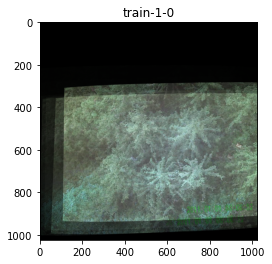

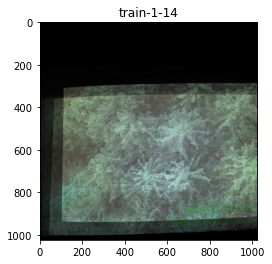

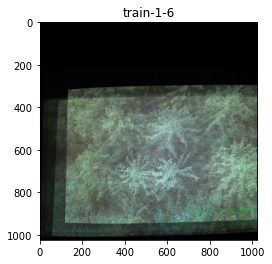

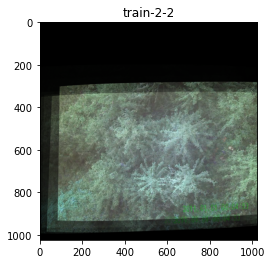

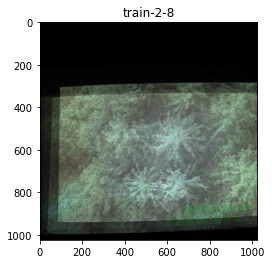

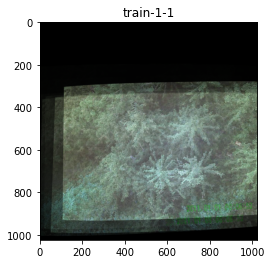

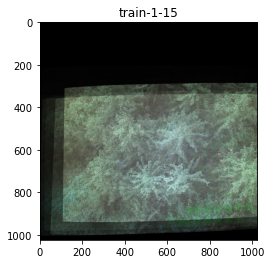

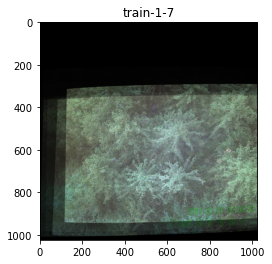

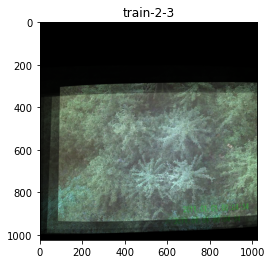

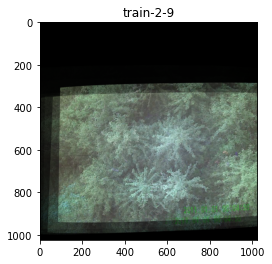

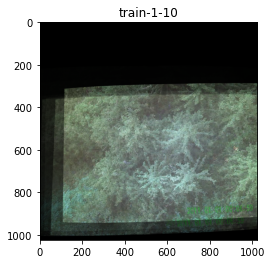

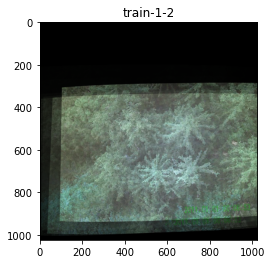

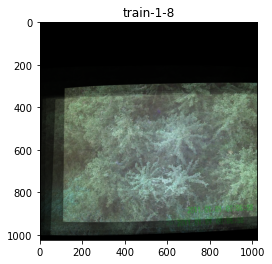

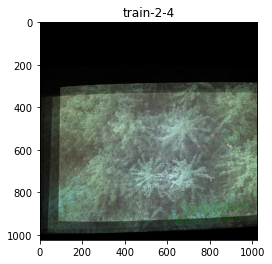

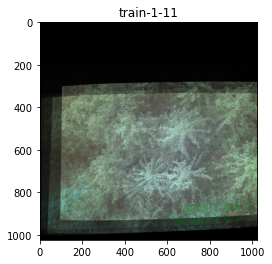

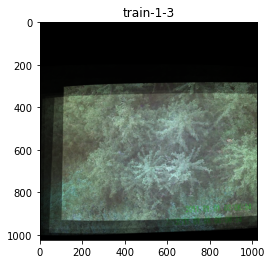

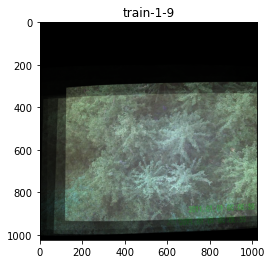

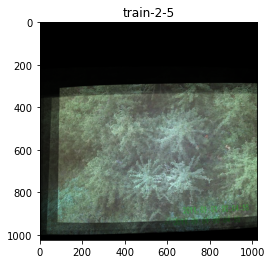

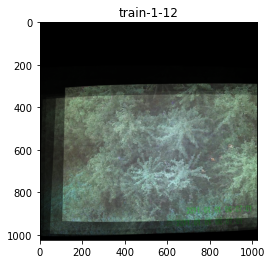

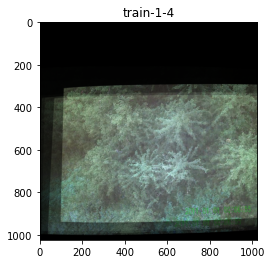

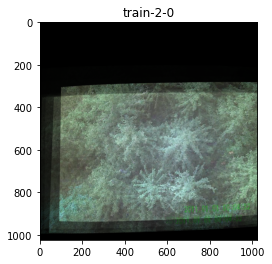

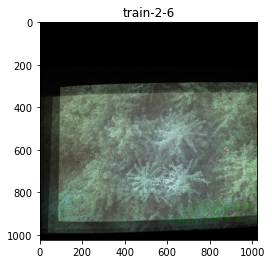

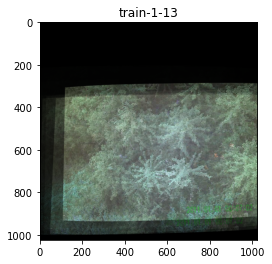

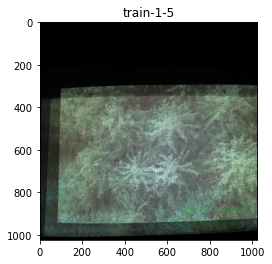

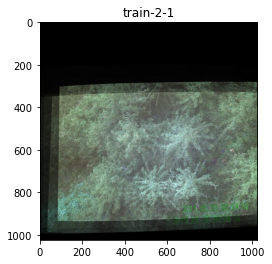

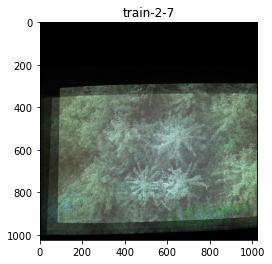

In [10]:
for t in list(train_images.keys()):
    plt.imshow(train_images[t])
    plt.title(t)
    plt.show()

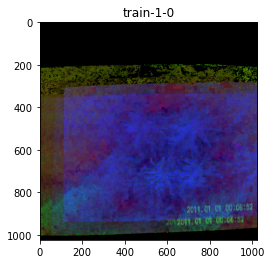

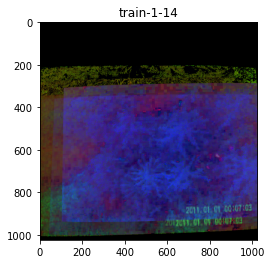

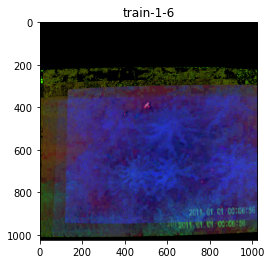

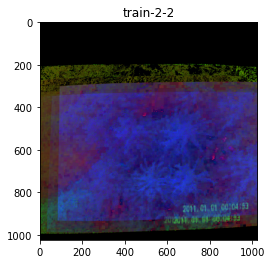

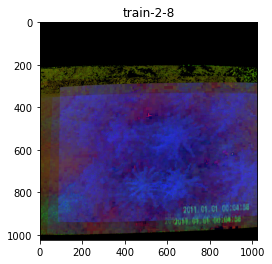

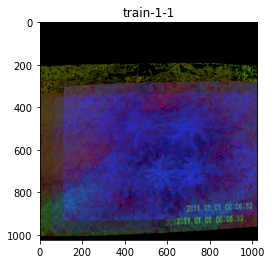

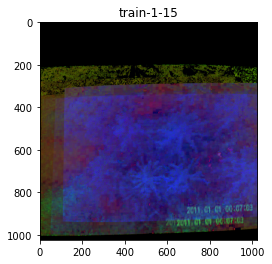

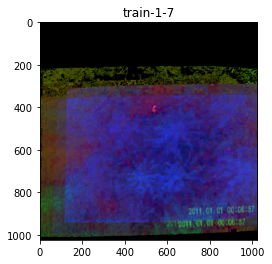

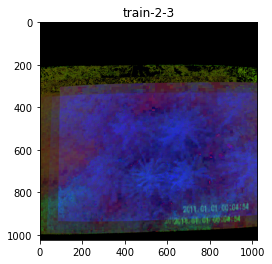

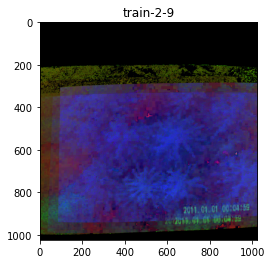

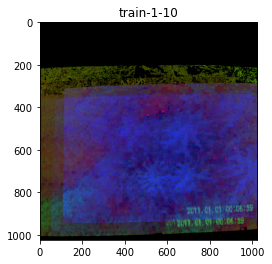

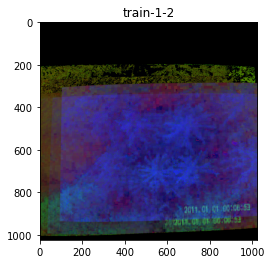

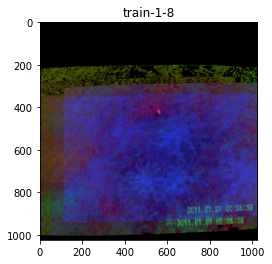

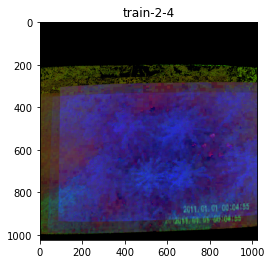

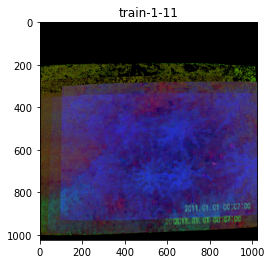

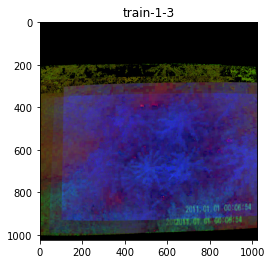

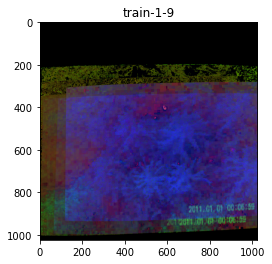

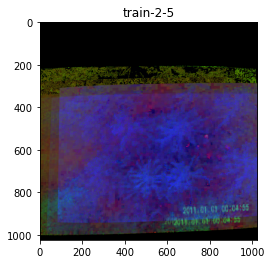

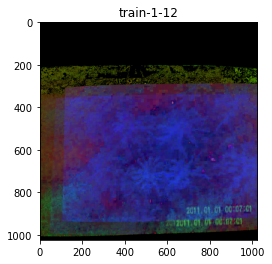

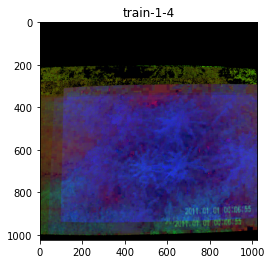

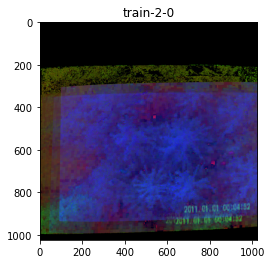

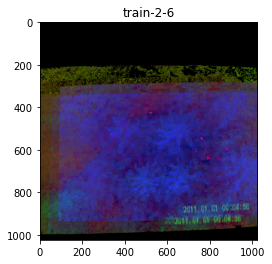

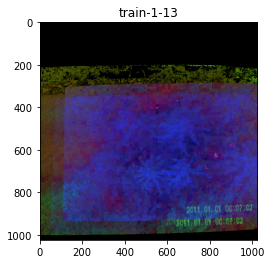

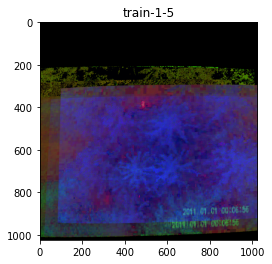

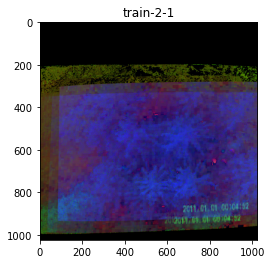

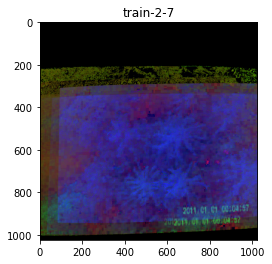

In [16]:
filtered_images = {}
for t in list(train_images.keys()):
    filtered_image = cv2.cvtColor(train_images[t], cv2.COLOR_BGR2HSV)
    #gray_image = cv2.GaussianBlur(gray_image,(15,15),0)
    filtered_images[t] = filtered_image
    plt.imshow(filtered_image)
    plt.title(t)
    plt.show()

In [22]:
# anomaly detection (whole image)
def quantify_image(image, bins=(4, 6, 3)):
    # compute a 3D color histogram over the image and normalize it
    hist = cv2.calcHist([image], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

data = []

i = 0
for im in filtered_images.values():
    data.append(quantify_image(im, (3, 3, 3)))

from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100,
                       contamination=0.01,
                       random_state=42)
model.fit(data[:-1])

model.predict([data[-1]])[0]

IsolationForest(contamination=0.01, random_state=42)

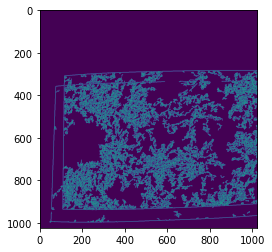

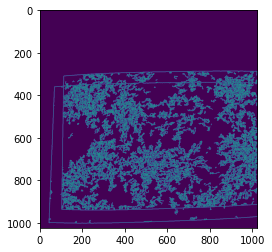

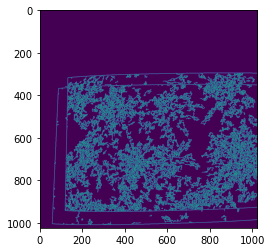

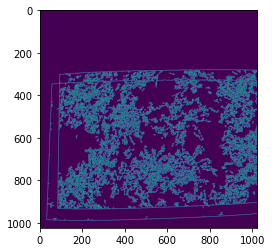

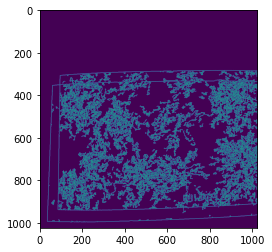

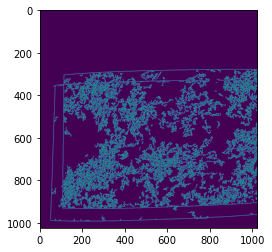

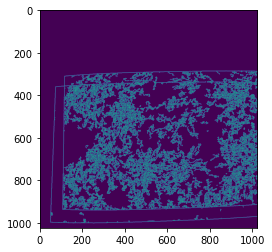

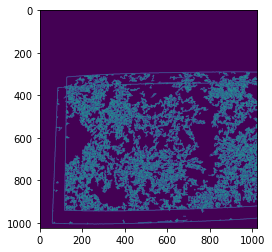

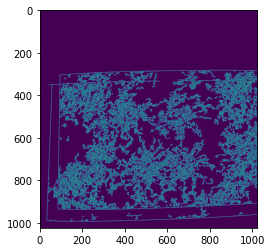

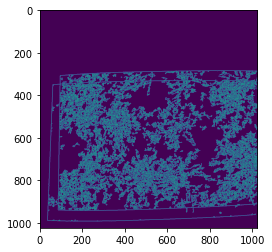

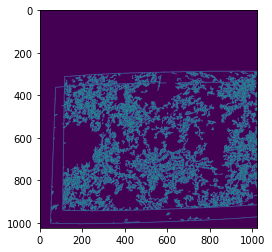

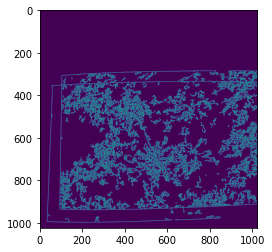

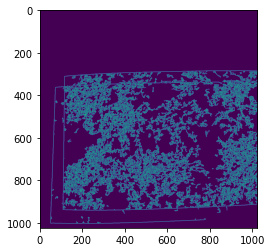

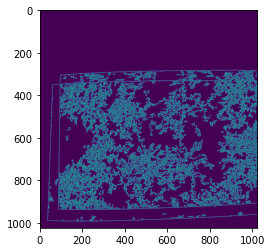

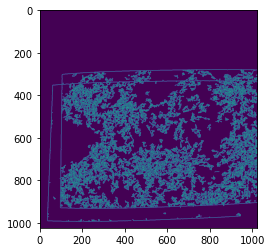

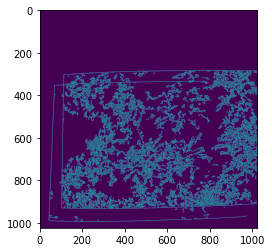

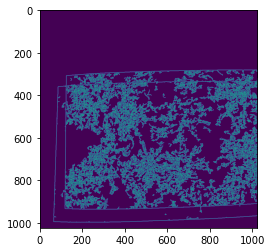

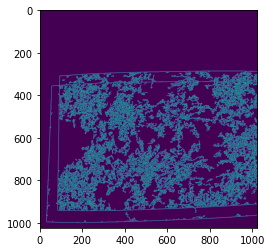

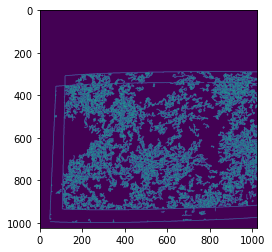

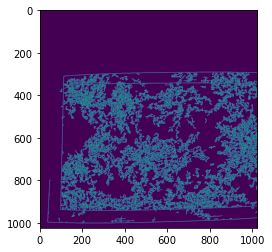

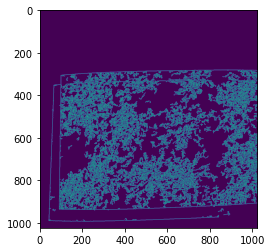

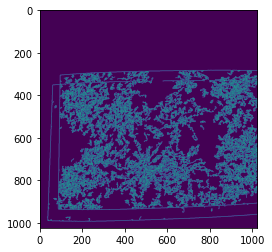

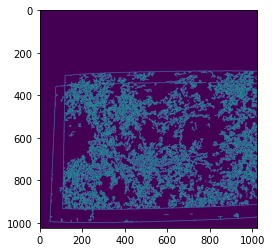

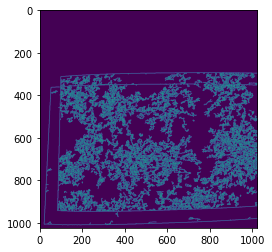

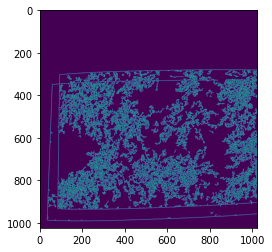

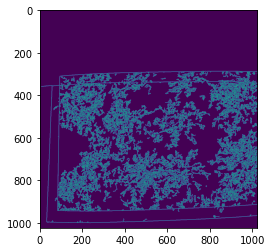

In [67]:
#edges
edges = {}
for t in list(train_images.keys()):
    edge = cv2.Canny(train_images[t], 50, 200)
    edges[t] = edge
    plt.imshow(edge)
    plt.show()
    

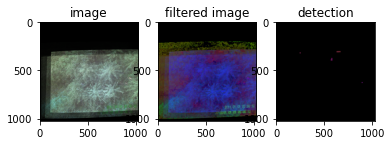

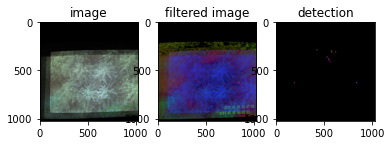

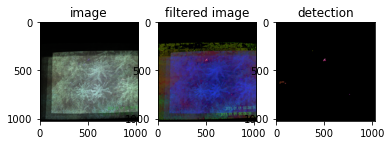

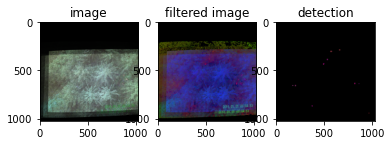

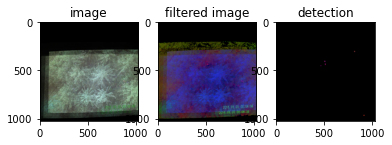

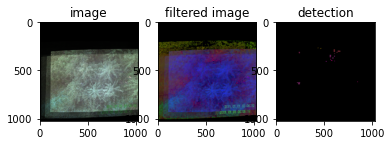

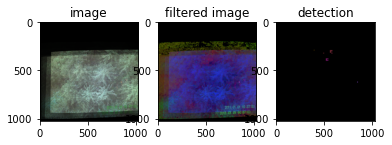

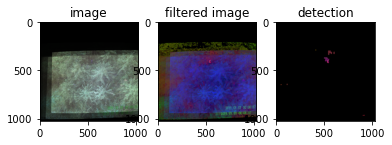

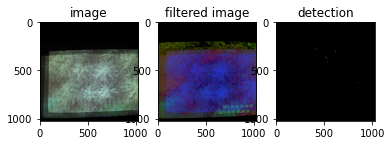

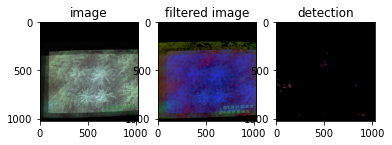

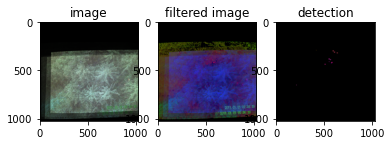

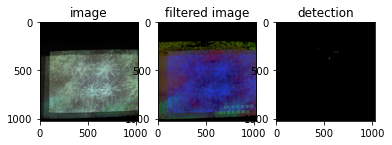

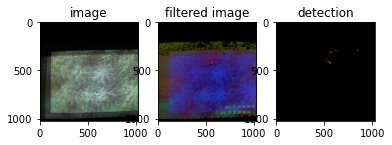

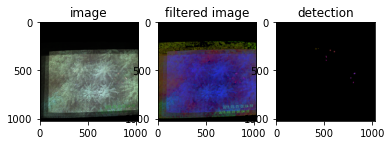

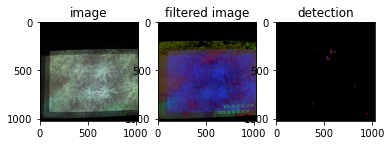

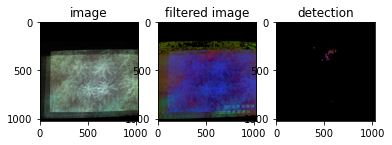

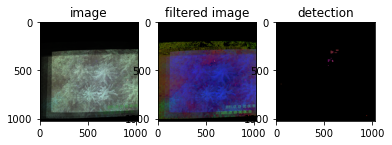

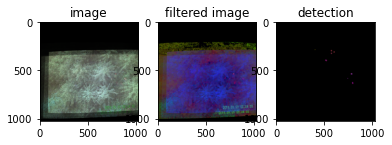

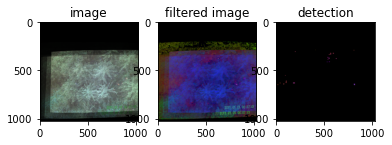

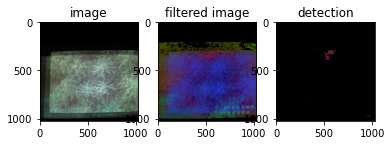

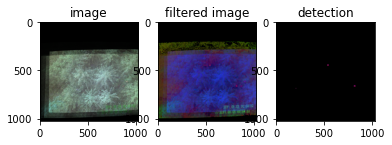

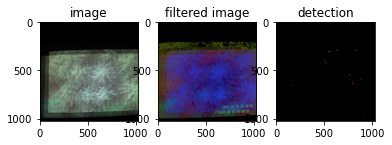

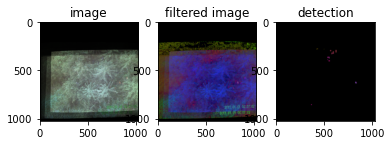

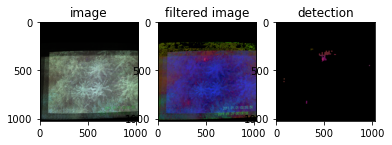

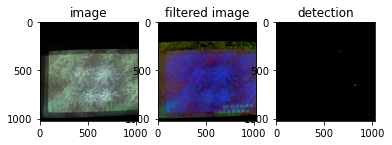

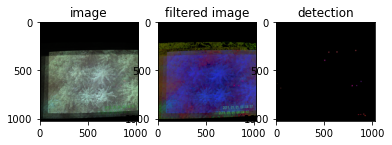

In [69]:
for t in list(filtered_images.keys()):
    # lower bound and upper bound for Green color
    lower_bound = np.array([100, 0, 0]) 
    upper_bound = np.array([255, 255, 255])

    # find the colors within the boundaries
    mask = cv2.inRange(filtered_images[t], lower_bound, upper_bound)
    
    #define kernel size  
    kernel = np.ones((7,7),np.uint8)

    # Remove unnecessary noise from mask

    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # Segment only the detected region
    segmented_img = cv2.bitwise_and(filtered_images[t], 
                                    filtered_images[t], 
                                    mask=mask)
    
    plt.subplot(1, 3, 1)
    plt.title('image')
    plt.imshow(train_images[t])
    plt.subplot(1, 3, 2)
    plt.title('filtered image')
    plt.imshow(filtered_images[t])
    plt.subplot(1, 3, 3)
    plt.title('detection')
    plt.imshow(segmented_img)
    plt.show()
    

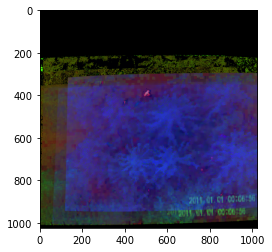

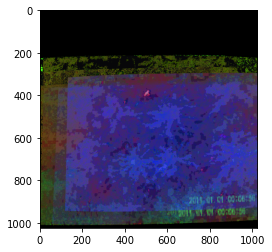

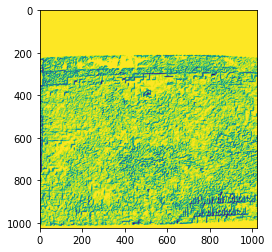

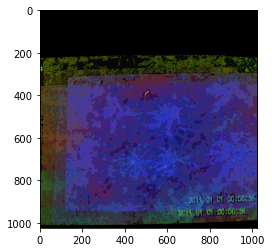

In [72]:
import numpy as np
import skimage
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from skimage import io
from math import tanh
def quant_12(x):
    if(x < 100/12):
        q= 0
    elif(x < 100/12*2):
        q= 100/12
    elif(x < 100/12*3):
        q= 100/12*2
    elif(x < 100/12*4):
        q= 100/12*3
    elif(x < 100/12*5):
        q= 100/12*4
    elif(x < 100/12*6):
        q= 100/12*5
    elif(x < 100/12*7):
        q= 100/12*6
    elif(x < 100/12*8):
        q= 100/12*7
    elif(x < 100/12*9):
        q= 100/12*8
    elif(x < 100/12*10):
        q= 100/12*9
    elif(x < 100/12*11):
        q= 100/12*10
    elif(x < 100/12*12):
        q= 100/12*11
    else:
        q= 100
    return q

def quant_8(x):
    if(x < 100/8):
        q= 0
    elif(x < 100/8*2):
        q= 100/8
    elif(x < 100/8*3):
        q= 100/8*2
    elif(x < 100/8*4):
        q= 100/8*3
    elif(x < 100/8*5):
        q= 100/8*4
    elif(x < 100/8*6):
        q= 100/8*5
    elif(x < 100/8*7):
        q= 100/8*6
    elif(x < 100/8*8):
        q= 100/8*7
    else:
        q= 100
    return q

img = filtered_images['train-1-6']
img = img[..., :3].astype(np.float32)/255
#1 feature space conversion
x = skimage.color.rgb2lab(img)
#2 abstraction
# apply the bilateral filter several times
sigma_d = 3
sigma_r = 4.25
d = 9 # diameter of each pixel neighborhood

n_e = 2
n_b = 4
# n_e = 1:
res = cv2.bilateralFilter(x, d=d, sigmaColor=sigma_d, sigmaSpace=sigma_r)
# n_e = 2:
abstracted_for_edge = cv2.bilateralFilter(res, d=d, sigmaColor=sigma_d, sigmaSpace=sigma_r)
# n_b = 3:
res = cv2.bilateralFilter(abstracted_for_edge, d=d, sigmaColor=sigma_d, sigmaSpace=sigma_r)
# n_b = 4:
abstracted = cv2.bilateralFilter(res, d=d, sigmaColor=sigma_d, sigmaSpace=sigma_r)

abstracted_rgb = skimage.color.lab2rgb(abstracted)

plt.figure()
plt.imshow(abstracted_rgb)


#3-a quantization - 12 bins
# LAB 100 - RGB 255
delta_q = 12 # bin width
res = np.zeros((x.shape[0], x.shape[1]))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):

        a = abstracted[i, j][0]
        res[i, j] = quant_12(a)+ delta_q/2 * tanh(9 * (a - quant_12(a)))
        
quantized = x
quantized[:, :, 0] = res
quantized_rgb = skimage.color.lab2rgb(quantized)

plt.figure()
plt.imshow(quantized_rgb)

#3-b edges
#x = skimage.color.rgb2lab(img)

sigma_e = 9
tau = 0.98 #
x_gray = cv2.cvtColor(abstracted_for_edge, cv2.COLOR_BGR2GRAY)
x_blur = cv2.GaussianBlur(x_gray, (3, 3), sigma_e)
h = cv2.Sobel(x_blur, 0, 1, 0, cv2.CV_64F, ksize=5)
v = cv2.Sobel(x_blur, 0, 0, 1, cv2.CV_64F, ksize=5)

edges = cv2.bitwise_or(h, v)
edges = cv2.bitwise_not(edges)

plt.figure()
plt.imshow(edges)
# combine
res = cv2.bitwise_and(quantized, quantized, mask=edges)
res = skimage.color.lab2rgb(res)
plt.figure()
plt.imshow(res)

